In [1]:
import pandas as pd

# Data

Scraped from https://www.hockey-reference.com

In [2]:
df = pd.read_csv('data/nhl.csv')

In [3]:
df.head(1)

,Unnamed: 0,Date,Visitor,G,Home,G.1,Unnamed: 5,Att.,LOG,Notes
0,0,2019-10-02,Vancouver Canucks,2.0,Edmonton Oilers,3.0,NaN,18347.0,2:23,NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'Visitor', 'G', 'Home', 'G.1', 'Unnamed: 5',
       'Att.', 'LOG', 'Notes'],
      dtype='object')

In [5]:
df.columns = [c.lower() for c in df.columns]

In [6]:
df.head(1)

,unnamed: 0,date,visitor,g,home,g.1,unnamed: 5,att.,log,notes
0,0,2019-10-02,Vancouver Canucks,2.0,Edmonton Oilers,3.0,NaN,18347.0,2:23,NaN


In [7]:
df = df.rename(columns={'g': 'gv', 'g.1': 'gh', 'unnamed: 5': 'extra_loss'})

In [8]:
df = df[['date', 'home', 'visitor', 'gh', 'gv', 'extra_loss']]

Let's run some quick data checks:

In [9]:
df.head()

,date,home,visitor,gh,gv,extra_loss
0,2019-10-02,Edmonton Oilers,Vancouver Canucks,3.0,2.0,NaN
1,2019-10-02,St. Louis Blues,Washington Capitals,2.0,3.0,OT
2,2019-10-02,Toronto Maple Leafs,Ottawa Senators,5.0,3.0,NaN
3,2019-10-02,Vegas Golden Knights,San Jose Sharks,4.0,1.0,NaN
4,2019-10-03,Anaheim Ducks,Arizona Coyotes,2.0,1.0,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
date          373 non-null object
home          373 non-null object
visitor       373 non-null object
gh            373 non-null float64
gv            373 non-null float64
extra_loss    102 non-null object
dtypes: float64(2), object(4)
memory usage: 17.6+ KB


In [11]:
df['extra_loss'].isnull()[:10]

0     True
1    False
2     True
3     True
4     True
5    False
6     True
7     True
8     True
9     True
Name: extra_loss, dtype: bool

In [12]:
import numpy as np

# pd.options.mode.chained_assignment = None 

df['extra_loss'] = np.where(df['extra_loss'].isnull() == True, 0, 1)

In [13]:
df.head()

,date,home,visitor,gh,gv,extra_loss
0,2019-10-02,Edmonton Oilers,Vancouver Canucks,3.0,2.0,0
1,2019-10-02,St. Louis Blues,Washington Capitals,2.0,3.0,1
2,2019-10-02,Toronto Maple Leafs,Ottawa Senators,5.0,3.0,0
3,2019-10-02,Vegas Golden Knights,San Jose Sharks,4.0,1.0,0
4,2019-10-03,Anaheim Ducks,Arizona Coyotes,2.0,1.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
date          373 non-null object
home          373 non-null object
visitor       373 non-null object
gh            373 non-null float64
gv            373 non-null float64
extra_loss    373 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.6+ KB


# iterrows()

Iterating through rows is usually a (slow and) bad idea...

In [15]:
slim = df.loc[:10].copy()
for i, row in slim.iterrows():
    slim.at[i, 'gh'] = row.gh * 100
    # row['gh'] = row.gh * 100

In [16]:
slim

,date,home,visitor,gh,gv,extra_loss
0,2019-10-02,Edmonton Oilers,Vancouver Canucks,300.0,2.0,0
1,2019-10-02,St. Louis Blues,Washington Capitals,200.0,3.0,1
2,2019-10-02,Toronto Maple Leafs,Ottawa Senators,500.0,3.0,0
3,2019-10-02,Vegas Golden Knights,San Jose Sharks,400.0,1.0,0
4,2019-10-03,Anaheim Ducks,Arizona Coyotes,200.0,1.0,0
5,2019-10-03,Carolina Hurricanes,Montreal Canadiens,400.0,3.0,1
6,2019-10-03,Colorado Avalanche,Calgary Flames,500.0,3.0,0
7,2019-10-03,Dallas Stars,Boston Bruins,100.0,2.0,0
8,2019-10-03,Nashville Predators,Minnesota Wild,500.0,2.0,0
9,2019-10-03,New York Rangers,Winnipeg Jets,600.0,4.0,0


Just do this:

In [17]:
slim = df.loc[:10].copy()
slim['gh'] *= 100
slim

,date,home,visitor,gh,gv,extra_loss
0,2019-10-02,Edmonton Oilers,Vancouver Canucks,300.0,2.0,0
1,2019-10-02,St. Louis Blues,Washington Capitals,200.0,3.0,1
2,2019-10-02,Toronto Maple Leafs,Ottawa Senators,500.0,3.0,0
3,2019-10-02,Vegas Golden Knights,San Jose Sharks,400.0,1.0,0
4,2019-10-03,Anaheim Ducks,Arizona Coyotes,200.0,1.0,0
5,2019-10-03,Carolina Hurricanes,Montreal Canadiens,400.0,3.0,1
6,2019-10-03,Colorado Avalanche,Calgary Flames,500.0,3.0,0
7,2019-10-03,Dallas Stars,Boston Bruins,100.0,2.0,0
8,2019-10-03,Nashville Predators,Minnesota Wild,500.0,2.0,0
9,2019-10-03,New York Rangers,Winnipeg Jets,600.0,4.0,0


Sometimes, however, iterating is unavoidable...

In [18]:
teams = sorted(list(df.home.unique()))
points = {team: 0 for team in teams}

In [19]:
for i, row in df.iterrows():
    if row.extra_loss and row.gh > row.gv:
        points[row.home] += 2
        points[row.visitor] += 1
    elif row.extra_loss and row.gh < row.gv:
        points[row.home] += 1
        points[row.visitor] += 2
    elif row.gh > row.gv:
        points[row.home] += 2
    else:
        points[row.visitor] += 2

In [20]:
points

{'Anaheim Ducks': 25,
 'Arizona Coyotes': 31,
 'Boston Bruins': 35,
 'Buffalo Sabres': 25,
 'Calgary Flames': 26,
 'Carolina Hurricanes': 31,
 'Chicago Blackhawks': 23,
 'Colorado Avalanche': 28,
 'Columbus Blue Jackets': 24,
 'Dallas Stars': 32,
 'Detroit Red Wings': 17,
 'Edmonton Oilers': 35,
 'Florida Panthers': 29,
 'Los Angeles Kings': 20,
 'Minnesota Wild': 22,
 'Montreal Canadiens': 27,
 'Nashville Predators': 25,
 'New Jersey Devils': 20,
 'New York Islanders': 34,
 'New York Rangers': 24,
 'Ottawa Senators': 23,
 'Philadelphia Flyers': 29,
 'Pittsburgh Penguins': 30,
 'San Jose Sharks': 27,
 'St. Louis Blues': 34,
 'Tampa Bay Lightning': 26,
 'Toronto Maple Leafs': 26,
 'Vancouver Canucks': 28,
 'Vegas Golden Knights': 26,
 'Washington Capitals': 37,
 'Winnipeg Jets': 29}

In [21]:
points = pd.DataFrame(points, index=[0])

In [22]:
points

,Anaheim Ducks,Arizona Coyotes,Boston Bruins,Buffalo Sabres,Calgary Flames,Carolina Hurricanes,Chicago Blackhawks,Colorado Avalanche,Columbus Blue Jackets,Dallas Stars,...,Philadelphia Flyers,Pittsburgh Penguins,San Jose Sharks,St. Louis Blues,Tampa Bay Lightning,Toronto Maple Leafs,Vancouver Canucks,Vegas Golden Knights,Washington Capitals,Winnipeg Jets
0,25,31,35,25,26,31,23,28,24,32,...,29,30,27,34,26,26,28,26,37,29


In [23]:
(
    points
    .T
    .rename(columns={0: 'points'})
    .sort_values('points', ascending=False)
    .head(10)
)

,points
Washington Capitals,37
Boston Bruins,35
Edmonton Oilers,35
St. Louis Blues,34
New York Islanders,34
Dallas Stars,32
Arizona Coyotes,31
Carolina Hurricanes,31
Pittsburgh Penguins,30
Winnipeg Jets,29


That's all great and good, but what if I want to keep track of points intra-season?

In [24]:
points = {team: 0 for team in teams}
dates = {}
for i, row in df.iterrows():
    if row.extra_loss and row.gh > row.gv:
        points[row.home] += 2
        points[row.visitor] += 1
    elif row.extra_loss and row.gh < row.gv:
        points[row.home] += 1
        points[row.visitor] += 2
    elif row.gh > row.gv:
        points[row.home] += 2
    else:
        points[row.visitor] += 2
    dates[row.date] = points.copy()

In [26]:
dates = pd.DataFrame(dates)

In [27]:
dates.head(10)

,2019-10-02,2019-10-03,2019-10-04,2019-10-05,2019-10-06,2019-10-07,2019-10-08,2019-10-09,2019-10-10,2019-10-11,...,2019-11-16,2019-11-17,2019-11-18,2019-11-19,2019-11-20,2019-11-21,2019-11-22,2019-11-23,2019-11-24,2019-11-25
Anaheim Ducks,0,2,2,4,4,4,6,6,6,8,...,22,22,22,22,22,23,23,23,23,25
Arizona Coyotes,0,0,0,0,0,0,0,0,2,2,...,26,26,28,28,28,28,28,30,31,31
Boston Bruins,0,2,2,4,4,4,6,6,6,6,...,29,29,29,31,31,33,33,35,35,35
Buffalo Sabres,0,2,2,4,4,5,5,7,7,9,...,23,23,23,23,23,23,23,23,25,25
Calgary Flames,0,0,0,2,2,2,3,3,5,5,...,23,23,23,23,23,23,23,25,25,26
Carolina Hurricanes,0,2,2,4,6,6,8,8,8,10,...,25,25,25,27,27,27,27,29,31,31
Chicago Blackhawks,0,0,0,0,0,0,0,0,0,0,...,20,22,22,22,22,22,22,23,23,23
Colorado Avalanche,0,2,2,4,4,4,4,4,6,6,...,26,26,26,28,28,28,28,28,28,28
Columbus Blue Jackets,0,0,0,0,0,2,2,2,2,2,...,18,18,18,20,20,22,22,22,22,24
Dallas Stars,0,0,0,0,0,0,2,2,3,3,...,24,24,24,26,26,28,28,30,30,32


# melt

In [28]:
dates.T.head(10)

,Anaheim Ducks,Arizona Coyotes,Boston Bruins,Buffalo Sabres,Calgary Flames,Carolina Hurricanes,Chicago Blackhawks,Colorado Avalanche,Columbus Blue Jackets,Dallas Stars,...,Philadelphia Flyers,Pittsburgh Penguins,San Jose Sharks,St. Louis Blues,Tampa Bay Lightning,Toronto Maple Leafs,Vancouver Canucks,Vegas Golden Knights,Washington Capitals,Winnipeg Jets
2019-10-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,0,2,2,0
2019-10-03,2,0,2,2,0,2,0,2,0,0,...,0,0,0,1,2,2,0,2,2,0
2019-10-04,2,0,2,2,0,2,0,2,0,0,...,2,0,0,1,2,4,0,4,4,2
2019-10-05,4,0,4,4,2,4,0,4,0,0,...,2,2,0,3,2,5,0,4,5,2
2019-10-06,4,0,4,4,2,6,0,4,0,0,...,2,2,0,3,3,5,0,4,5,2
2019-10-07,4,0,4,5,2,6,0,4,2,0,...,2,2,0,5,3,5,0,4,5,2
2019-10-08,6,0,6,5,3,8,0,4,2,2,...,2,2,0,5,3,5,0,4,6,4
2019-10-09,6,0,6,7,3,8,0,4,2,2,...,4,2,0,5,3,5,2,4,6,4
2019-10-10,6,2,6,7,5,8,0,6,2,3,...,4,4,2,7,5,5,2,4,6,6
2019-10-11,8,2,6,9,5,10,0,6,2,3,...,4,4,2,7,5,5,2,4,6,6


In [29]:
dates = dates.reset_index().rename(columns={'index':'team'})

In [30]:
df = pd.melt(dates, id_vars='team', var_name='date', value_name='points')

In [31]:
df['date'] = df['date'].apply(pd.to_datetime)

In [32]:
df.head()

,team,date,points
0,Anaheim Ducks,2019-10-02,0
1,Arizona Coyotes,2019-10-02,0
2,Boston Bruins,2019-10-02,0
3,Buffalo Sabres,2019-10-02,0
4,Calgary Flames,2019-10-02,0


In [33]:
# opposite of melt
df.set_index(['team', 'date'])['points'].unstack(fill_value=0)
df.pivot(index='team',columns='date', values='points').head(10)

date,2019-10-02 00:00:00,2019-10-03 00:00:00,2019-10-04 00:00:00,2019-10-05 00:00:00,2019-10-06 00:00:00,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:00:00,2019-10-10 00:00:00,2019-10-11 00:00:00,...,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00
team,,,,,,,,,,,,,,,,,,,,,
Anaheim Ducks,0,2,2,4,4,4,6,6,6,8,...,22,22,22,22,22,23,23,23,23,25
Arizona Coyotes,0,0,0,0,0,0,0,0,2,2,...,26,26,28,28,28,28,28,30,31,31
Boston Bruins,0,2,2,4,4,4,6,6,6,6,...,29,29,29,31,31,33,33,35,35,35
Buffalo Sabres,0,2,2,4,4,5,5,7,7,9,...,23,23,23,23,23,23,23,23,25,25
Calgary Flames,0,0,0,2,2,2,3,3,5,5,...,23,23,23,23,23,23,23,25,25,26
Carolina Hurricanes,0,2,2,4,6,6,8,8,8,10,...,25,25,25,27,27,27,27,29,31,31
Chicago Blackhawks,0,0,0,0,0,0,0,0,0,0,...,20,22,22,22,22,22,22,23,23,23
Colorado Avalanche,0,2,2,4,4,4,4,4,6,6,...,26,26,26,28,28,28,28,28,28,28
Columbus Blue Jackets,0,0,0,0,0,2,2,2,2,2,...,18,18,18,20,20,22,22,22,22,24


# Plot

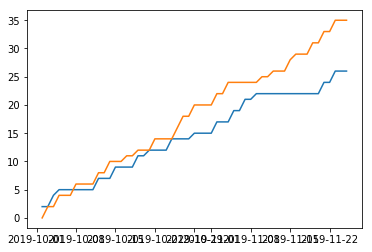

In [34]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

leafs = df[df.team.isin(['Toronto Maple Leafs'])]
bruins = df[df.team == 'Boston Bruins']

plt.plot(leafs['date'], leafs['points'])
plt.plot(bruins['date'], bruins['points'])

# Resample

In [35]:
df.set_index('date').resample('W').mean()

,points
date,
2019-10-06,1.348387
2019-10-13,4.004608
2019-10-20,7.548387
2019-10-27,11.036866
2019-11-03,14.322581
2019-11-10,17.870968
2019-11-17,21.506912
2019-11-24,25.046083
2019-12-01,27.354839


# Cut

In [36]:
points = pd.DataFrame(points, index=[0]).T.rename(columns={0: 'pts'})

In [37]:
points.head()

,pts
Anaheim Ducks,25
Arizona Coyotes,31
Boston Bruins,35
Buffalo Sabres,25
Calgary Flames,26


In [38]:
pd.cut(points.pts, bins=4, labels=['bad', 'mediocre', 'okay', 'good'])

Anaheim Ducks            mediocre
Arizona Coyotes              okay
Boston Bruins                good
Buffalo Sabres           mediocre
Calgary Flames           mediocre
Carolina Hurricanes          okay
Chicago Blackhawks       mediocre
Colorado Avalanche           okay
Columbus Blue Jackets    mediocre
Dallas Stars                 okay
Detroit Red Wings             bad
Edmonton Oilers              good
Florida Panthers             okay
Los Angeles Kings             bad
Minnesota Wild                bad
Montreal Canadiens       mediocre
Nashville Predators      mediocre
New Jersey Devils             bad
New York Islanders           good
New York Rangers         mediocre
Ottawa Senators          mediocre
Philadelphia Flyers          okay
Pittsburgh Penguins          okay
San Jose Sharks          mediocre
St. Louis Blues              good
Tampa Bay Lightning      mediocre
Toronto Maple Leafs      mediocre
Vancouver Canucks            okay
Vegas Golden Knights     mediocre
Washington Cap

# duplicated

In [39]:
leafs = df[df.team == 'Toronto Maple Leafs'].reset_index(drop=True)

In [40]:
leafs.head()

,team,date,points
0,Toronto Maple Leafs,2019-10-02,2
1,Toronto Maple Leafs,2019-10-03,2
2,Toronto Maple Leafs,2019-10-04,4
3,Toronto Maple Leafs,2019-10-05,5
4,Toronto Maple Leafs,2019-10-06,5


In [41]:
leafs = leafs[~leafs['points'].duplicated()]

In [42]:
leafs.head()

,team,date,points
0,Toronto Maple Leafs,2019-10-02,2
2,Toronto Maple Leafs,2019-10-04,4
3,Toronto Maple Leafs,2019-10-05,5
10,Toronto Maple Leafs,2019-10-12,7
13,Toronto Maple Leafs,2019-10-15,9


In [43]:
season = pd.DataFrame({
    'date': pd.date_range(start='2019-10-02', end='2020-06-30')
})

season['team'] = 'Toronto Maple Leafs'

In [44]:
season = pd.merge(season, leafs, how='left', on=['team', 'date'])

In [45]:
season.head(10)

,date,team,points
0,2019-10-02,Toronto Maple Leafs,2.0
1,2019-10-03,Toronto Maple Leafs,NaN
2,2019-10-04,Toronto Maple Leafs,4.0
3,2019-10-05,Toronto Maple Leafs,5.0
4,2019-10-06,Toronto Maple Leafs,NaN
5,2019-10-07,Toronto Maple Leafs,NaN
6,2019-10-08,Toronto Maple Leafs,NaN
7,2019-10-09,Toronto Maple Leafs,NaN
8,2019-10-10,Toronto Maple Leafs,NaN
9,2019-10-11,Toronto Maple Leafs,NaN


In [46]:
season['points'] = season['points'].ffill()

# split

In [47]:
df[['city', 'name']] = df.team.str.split(' ', 1, expand=True)

In [48]:
df = df[['city', 'name', 'team', 'date', 'points']]

In [49]:
df.sample(10)

,city,name,team,date,points
1085,Anaheim,Ducks,Anaheim Ducks,2019-11-06,19
375,Buffalo,Sabres,Buffalo Sabres,2019-10-14,11
393,Philadelphia,Flyers,Philadelphia Flyers,2019-10-14,5
1589,Columbus,Blue Jackets,Columbus Blue Jackets,2019-11-22,22
1300,Washington,Capitals,Washington Capitals,2019-11-12,30
1565,Montreal,Canadiens,Montreal Canadiens,2019-11-21,27
1200,Pittsburgh,Penguins,Pittsburgh Penguins,2019-11-09,21
441,Colorado,Avalanche,Colorado Avalanche,2019-10-16,11
694,Florida,Panthers,Florida Panthers,2019-10-24,12
991,Winnipeg,Jets,Winnipeg Jets,2019-11-02,16


# Groupby

In [50]:
df = df.copy()

In [51]:
df['points'].shift(1)

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       2.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       1.0
26       0.0
27       2.0
28       0.0
29       2.0
        ... 
1675    25.0
1676    31.0
1677    35.0
1678    25.0
1679    26.0
1680    31.0
1681    23.0
1682    28.0
1683    24.0
1684    32.0
1685    17.0
1686    35.0
1687    29.0
1688    20.0
1689    22.0
1690    27.0
1691    25.0
1692    20.0
1693    34.0
1694    24.0
1695    23.0
1696    29.0
1697    30.0
1698    27.0
1699    34.0
1700    26.0
1701    26.0
1702    28.0
1703    26.0
1704    37.0
Name: points, Length: 1705, dtype: float64

In [52]:
df['before'] = df.groupby('team')['points'].shift(1)

In [53]:
df = df.fillna(0)

In [54]:
leafs = df[df.team == 'Toronto Maple Leafs'].copy()

In [55]:
leafs['before'] = leafs['before'].apply(int)

In [56]:
leafs['points_gained_from_game'] = leafs.points - leafs.before

In [57]:
leafs[leafs.points_gained_from_game == 1]

,city,name,team,date,points,before,points_gained_from_game
119,Toronto,Maple Leafs,Toronto Maple Leafs,2019-10-05,5,4,1
615,Toronto,Maple Leafs,Toronto Maple Leafs,2019-10-21,12,11,1
863,Toronto,Maple Leafs,Toronto Maple Leafs,2019-10-29,15,14,1
1204,Toronto,Maple Leafs,Toronto Maple Leafs,2019-11-09,22,21,1


# cumsum

In [58]:
leafs = leafs[['team', 'date', 'points_gained_from_game']]

In [59]:
leafs.head()

,team,date,points_gained_from_game
26,Toronto Maple Leafs,2019-10-02,2
57,Toronto Maple Leafs,2019-10-03,0
88,Toronto Maple Leafs,2019-10-04,2
119,Toronto Maple Leafs,2019-10-05,1
150,Toronto Maple Leafs,2019-10-06,0


In [60]:
leafs['points_gained_from_game'].cumsum()[:10]

26     2
57     2
88     4
119    5
150    5
181    5
212    5
243    5
274    5
305    5
Name: points_gained_from_game, dtype: int64